###Figure 8 from Nature Food Clark et al., 2023 

In [13]:
import xarray as xr
import numpy as np
import pandas as pd
import esmlab
#from ctsm_py import utils
#import segment as sg
import scipy                    
from scipy import signal
import cf_units as cf

# some resources for plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import statistics
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as tick
from matplotlib.ticker import MaxNLocator

In [14]:
from scipy import stats
from scipy import signal

In [15]:
filedir = '/glade/p/univ/urtg0006/Brendan/clmcrop/GRAINC_TO_FOOD_NEW/'
yhist = xr.open_dataset(filedir+'CLM5_danica_newlanduse_c161128_reanalysis.h1.yield.199001-201412.nc')
yhist3 = yhist.sel(time=slice('1994-01-01', '2013-12-31'))
yhist2 = yhist.sel(time=slice('1993-01-01', '2012-12-31'))
yhist1 = yhist.sel(time=slice('1992-01-01', '2011-12-31'))

ghist = xr.open_dataset(filedir+'i.e21.IHIST.f09_g17.CMIP6-land-hist.001.clm2.h1.GRAINC_TO_FOOD.195002-201512.nc')
ghist3 = ghist.sel(time=slice('1994-01-01', '2013-12-31'))
ghist2 = ghist.sel(time=slice('1993-01-01', '2012-12-31'))
ghist1 = ghist.sel(time=slice('1992-01-01', '2011-12-31'))

In [16]:
landfrac = ghist.landfrac

carea1 = yhist1['area'].sel(crops=0)
rarea1 = yhist1['area'].sel(crops=3)
sarea1 = yhist1['area'].sel(crops=6)
warea1 = yhist1['area'].sel(crops=9)
carwt1 = carea1 * landfrac
carwt1_norm_sum = carwt1/carwt1.sum()
rarwt1 = rarea1 * landfrac
rarwt1_norm_sum = rarwt1/rarwt1.sum()
sarwt1 = sarea1 * landfrac
sarwt1_norm_sum = sarwt1/sarwt1.sum()
warwt1 = warea1 * landfrac
warwt1_norm_sum = warwt1/warwt1.sum()

carea2 = yhist2['area'].sel(crops=0)
rarea2 = yhist2['area'].sel(crops=3)
sarea2 = yhist2['area'].sel(crops=6)
warea2 = yhist2['area'].sel(crops=9)
carwt2 = carea2 * landfrac
carwt2_norm_sum = carwt2/carwt2.sum()
rarwt2 = rarea2 * landfrac
rarwt2_norm_sum = rarwt2/rarwt2.sum()
sarwt2 = sarea2 * landfrac
sarwt2_norm_sum = sarwt2/sarwt2.sum()
warwt2 = warea2 * landfrac
warwt2_norm_sum = warwt2/warwt2.sum()

carea3 = yhist3['area'].sel(crops=0)
rarea3 = yhist3['area'].sel(crops=3)
sarea3 = yhist3['area'].sel(crops=6)
warea3 = yhist3['area'].sel(crops=9)
carwt3 = carea3 * landfrac
carwt3_norm_sum = carwt3/carwt3.sum()
rarwt3 = rarea3 * landfrac
rarwt3_norm_sum = rarwt3/rarwt3.sum()
sarwt3 = sarea3 * landfrac
sarwt3_norm_sum = sarwt3/sarwt3.sum()
warwt3 = warea3 * landfrac
warwt3_norm_sum = warwt3/warwt3.sum()

In [17]:
chist1 = yhist1['yield'].sel(crops=0)
rhist1 = yhist1['yield'].sel(crops=3)
shist1 = yhist1['yield'].sel(crops=6)
whist1 = yhist1['yield'].sel(crops=9)

chist2 = yhist2['yield'].sel(crops=0)
rhist2 = yhist2['yield'].sel(crops=3)
shist2 = yhist2['yield'].sel(crops=6)
whist2 = yhist2['yield'].sel(crops=9)

chist3 = yhist3['yield'].sel(crops=0)
rhist3 = yhist3['yield'].sel(crops=3)
shist3 = yhist3['yield'].sel(crops=6)
whist3 = yhist3['yield'].sel(crops=9)

In [18]:
chist1 = esmlab.statistics.weighted_mean(chist1, dim=('lat','lon'), weights=carwt1_norm_sum)
rhist1 = esmlab.statistics.weighted_mean(rhist1, dim=('lat','lon'), weights=rarwt1_norm_sum)
shist1 = esmlab.statistics.weighted_mean(shist1, dim=('lat','lon'), weights=sarwt1_norm_sum)
whist1 = esmlab.statistics.weighted_mean(whist1, dim=('lat','lon'), weights=warwt1_norm_sum)

chist2 = esmlab.statistics.weighted_mean(chist2, dim=('lat','lon'), weights=carwt2_norm_sum)
rhist2 = esmlab.statistics.weighted_mean(rhist2, dim=('lat','lon'), weights=rarwt2_norm_sum)
shist2 = esmlab.statistics.weighted_mean(shist2, dim=('lat','lon'), weights=sarwt2_norm_sum)
whist2 = esmlab.statistics.weighted_mean(whist2, dim=('lat','lon'), weights=warwt2_norm_sum)

chist3 = esmlab.statistics.weighted_mean(chist3, dim=('lat','lon'), weights=carwt3_norm_sum)
rhist3 = esmlab.statistics.weighted_mean(rhist3, dim=('lat','lon'), weights=rarwt3_norm_sum)
shist3 = esmlab.statistics.weighted_mean(shist3, dim=('lat','lon'), weights=sarwt3_norm_sum)
whist3 = esmlab.statistics.weighted_mean(whist3, dim=('lat','lon'), weights=warwt3_norm_sum)

In [19]:
cfao = (4.112,
3.8101,
4.2062,
4.1512,
4.4355,
4.4255,
4.3236,
4.4776,
4.3906,
4.461,
4.9448,
4.8188,
4.7753,
4.9827,
5.0695,
5.1496,
5.1579,
5.1392,
4.8543,
5.4213)
rfao = (3.6576,
3.658,
3.784,
3.8166,
3.816,
3.897,
3.8874,
3.9502,
3.8622,
3.9516,
4.0302,
4.0847,
4.1187,
4.2217,
4.2919,
4.3416,
4.3179,
4.4472,
4.5239,
4.4859)
sfao = (2.1825,
2.0312,
2.1316,
2.1565,
2.2562,
2.1901,
2.1708,
2.3061,
2.2925,
2.2796,
2.2433,
2.3175,
2.324,
2.437,
2.3979,
2.2476,
2.5772,
2.5188,
2.2884,
2.4991)
wfao = (2.4777,
2.4958,
2.564,
2.7157,
2.7063,
2.7462,
2.7316,
2.7417,
2.7551,
2.6514,
2.9426,
2.8287,
2.8904,
2.8155,
3.0626,
3.0357,
2.9721,
3.1639,
3.0917,
3.2472)

In [20]:
chist1 = scipy.signal.detrend(chist1)
chist2 = scipy.signal.detrend(chist2)
chist3 = scipy.signal.detrend(chist3)
cfao = scipy.signal.detrend(cfao)

In [23]:
rhist1 = scipy.signal.detrend(rhist1)
rhist2 = scipy.signal.detrend(rhist2)
rhist3 = scipy.signal.detrend(rhist3)
rfao = scipy.signal.detrend(rfao)

In [26]:
shist1 = scipy.signal.detrend(shist1)
shist2 = scipy.signal.detrend(shist2)
shist3 = scipy.signal.detrend(shist3)
sfao = scipy.signal.detrend(sfao)

In [29]:
whist1 = scipy.signal.detrend(whist1)
whist2 = scipy.signal.detrend(whist2)
whist3 = scipy.signal.detrend(whist3)
wfao = scipy.signal.detrend(wfao)

In [32]:
savedir = '/glade/p/univ/urtg0006/Brendan/nature_food_pdf_figs/'

In [33]:
time = np.linspace(1993, 2012, 20)

In [ ]:
fn = filedir + 'historical_nationalyield_1992-2013.xlsx'
m = 'maize'
r = 'rice'
s = 'soy'
w = 'wheat'
import scipy
from scipy import signal
from scipy import stats
FAO = (2.5321,
2.3629,
2.6005,
2.4761,
2.6228,
2.7964,
2.7765,
2.7182,
3.4019,
3.0559,
3.7273,
3.3671,
3.0403,
3.3823,
3.7852,
4.08,
3.7145,
4.3667,
4.2107,
5.0057)

FAO = scipy.signal.detrend(FAO)
CLM_1 = pd.read_excel(fn, sheet_name=m, usecols="B:U")
CLM_2 = pd.read_excel(fn, sheet_name=m, usecols="C:V")
CLM_3 = pd.read_excel(fn, sheet_name=m, usecols="D:W")
CLM_1 = CLM_1.iloc[27]
CLM_1 = scipy.signal.detrend(CLM_1)
CLM_2 = CLM_2.iloc[27]
CLM_2 = scipy.signal.detrend(CLM_2)
CLM_3 = CLM_3.iloc[27]
CLM_3 = scipy.signal.detrend(CLM_3)
#shift timeseries if correlation coefficient is increased by at least 0.3
stats.pearsonr(CLM_1,FAO)
stats.pearsonr(CLM_2,FAO)
stats.pearsonr(CLM_3,FAO)

In [45]:
#Maize
#3
FAO_US = (-1.33227857,  0.93699759, -0.74912624, -0.00395008, -0.13847391,
        0.23830226,  0.08847842,  0.17255459,  0.14543075, -0.51919308,
        0.17808308,  1.20785925,  0.32003541,  0.28321158,  0.27468774,
        0.32776391,  0.91564008,  0.06391624, -0.40650759, -2.00343143)
CLM_US = (-0.00905605, -0.02304733, -0.54525966,  0.50697685, -0.70045198,
        0.67227016,  0.1730146 , -0.24303916, -0.23384086, -0.04408036,
        0.61750353, -0.09127661, -0.49143342,  0.99124294, -0.03614545,
       -0.19451739,  0.7204774 , -0.80192895, -0.41348814,  0.14607986)

#2
FAO_china = (0.30366429, -0.00881143,  0.16621286,  0.40483714, -0.45653857,
        0.37438571,  0.00401   , -0.39016571, -0.33704143, -0.21081714,
       -0.31749286, -0.05796857,  0.06085571,  0.05238   , -0.15509571,
        0.18612857, -0.15824714, -0.00532286,  0.23540143,  0.30962571)
CLM_china =(0.11224132,  0.04927753,  0.08990415,  0.27465695, -0.47136107,
        0.10941276, -0.12600029, -0.1585535 , -0.06334969, -0.09584719,
        0.04489784,  0.20964606, -0.0124753 ,  0.01251294, -0.03153608,
        0.12946442, -0.14729316, -0.15625052,  0.11734288,  0.11330994)

#2
FAO_brazil = (0.31915714,  0.0354085 ,  0.15845985, -0.0804888 , -0.04833744,
        0.01071391, -0.12373474, -0.29658338,  0.27256797, -0.18798068,
        0.36887068, -0.10587797, -0.54722662, -0.31977526, -0.03142391,
        0.14882744, -0.3312212 ,  0.20643015, -0.0641185 ,  0.61633286)
CLM_brazil = (0.00656348,  0.08181013, -0.23568797,  0.07814129,  0.03661236,
       -0.27295248,  0.02203959,  0.20148566,  0.20131194,  0.09188179,
        0.00294002,  0.04356746, -0.19418655, -0.12179214,  0.20854922,
       -0.08826618,  0.08223948, -0.31872966,  0.00982223,  0.16465034)

#2
FAO_argentina = (-0.12927857, -0.38501188, -0.23744519, -0.8576785 , -0.4793118 ,
        0.90535489,  0.05992158, -0.01501173, -0.13024504,  0.35592165,
        0.61588835,  0.39465504,  1.22262173, -0.37071158,  1.25415511,
       -0.0964782 , -1.1106115 ,  0.97975519, -0.61157812, -1.36491143)

CLM_argentina = (0.35106137, -0.31595627, -0.44291907, -0.91122241,  0.79803167,
        0.51390183,  0.10652473, -1.17619253,  0.43969789, -0.11319602,
        0.46954116,  0.23547586,  0.60375245, -0.1233047 ,  0.49334378,
        0.08817861, -0.7126028 ,  0.3578428 , -0.00752545, -0.65443288)

#2
FAO_ukraine = (0.62385286, -0.01329165,  0.39196383,  0.05371932,  0.42597481,
       -0.4566697 , -0.62291421, -0.28985872, -0.21050323, -0.09034774,
       -0.30419226, -0.05933677,  0.24931872, -0.48802579, -0.4771703 ,
        0.15978519,  0.33414068, -0.32470383,  1.45115165, -0.35289286)
CLM_ukraine = (-0.03216678, -0.56358093, -0.10146302, -0.13966805,  1.02500091,
       -0.00329826, -0.24050178, -0.08076253, -0.08942814,  0.0402949 ,
        0.39191366,  0.33804011, -0.05424128, -0.15094503, -0.13056095,
       -0.00439719, -0.09758293, -0.22539757,  0.53053465, -0.41178979)

#RICE
#2
FAO_chinar = (-0.10780429, -0.16146015, -0.00551602,  0.14222812,  0.21207226,
        0.21761639,  0.16286053,  0.05640466, -0.0916512 , -0.09480707,
       -0.25596293, -0.0443188 , -0.13637466, -0.14903053, -0.03928639,
        0.05795774,  0.04790188, -0.02225398,  0.07959015,  0.13183429)
CLM_chinar = (0.33930271,  0.25299325,  0.05461452,  0.20277253, -0.15887188,
        0.20874072, -0.13721967, -0.4193977 , -0.49829738, -0.29201535,
       -0.2725828 , -0.13820668,  0.33741761,  0.06409186, -0.19294952,
        0.12358908,  0.20184242, -0.04596615,  0.27454415,  0.09559828)

#2
FAO_indiar = (1.56734286e-01,  1.49509098e-01, -5.92160902e-02,  2.47587218e-02,
        6.43353383e-03, -1.91654135e-04,  5.60831579e-02, -1.12742030e-01,
        1.10832782e-01, -4.30092406e-01,  2.98824060e-02, -1.53642782e-01,
       -1.69679699e-02, -3.61931579e-02,  3.88816541e-02, -4.40435338e-02,
       -9.97687218e-02, -1.90939098e-02,  1.68580902e-01,  2.30255714e-01)
CLM_indiar = (0.19027878, -0.06284185, -0.14594326,  0.01848641, -0.01452963,
        0.04767553,  0.19033981,  0.02454593, -0.14540778, -0.18104721,
        0.06621927, -0.02483788, -0.02883991,  0.011816  ,  0.08643049,
       -0.17787685, -0.02126778,  0.0926985 , -0.21594005,  0.29004149)

#2
FAO_indonesiar = (0.20023714,  0.12762955,  0.08812195,  0.11331436,  0.08580677,
       -0.19190083, -0.18030842, -0.07441602, -0.13012361, -0.0918312 ,
       -0.0612388 , -0.11024639, -0.11575398, -0.11246158, -0.12866917,
        0.09812323,  0.14921564,  0.12110805,  0.05240045,  0.16099286)
CLM_indonesiar = (0.37571613,  0.03750026, -0.0320299 ,  0.16009971,  0.13904472,
       -0.53551959, -0.00054203,  0.0663151 , -0.01292692, -0.07466713,
       -0.33159131, -0.18519567, -0.04408423,  0.0313914 , -0.1057626 ,
        0.11461367,  0.01087184, -0.00670027,  0.31830928,  0.07515753)

#
FAO_bangladeshr = (0.20811714, -0.08336361, -0.06924436, -0.06482511, -0.19040586,
       -0.10348662,  0.06883263,  0.23275188,  0.04537113,  0.02779038,
        0.00860962, -0.13807113,  0.00164812, -0.03143263,  0.09198662,
        0.04700586,  0.03752511,  0.03354436, -0.02273639, -0.09961714)
CLM_bangladeshr = (0.83481378, -0.11492797, -1.14439748, -0.16522997, -0.0619851 ,
        0.68399702, -1.17272621,  0.77205656, -0.34688135,  0.45359572,
        0.55092294, -0.02902577,  0.41805413, -0.21335683,  0.1120413 ,
        0.2520112 , -0.96960598, -0.27973617,  0.44769696, -0.02731677)

#2
FAO_vietnamr = (0.02919429, -0.00138564,  0.00793444, -0.02774549, -0.03462541,
       -0.02550534, -0.03918526, -0.01256519, -0.08524511,  0.10497496,
        0.03859504,  0.14041511,  0.05943519, -0.05014474, -0.07232466,
        0.05959541, -0.05158451, -0.06196444,  0.01995564,  0.00217571)
CLM_vietnamr = (-0.09467968,  0.05937282, -0.76252971,  0.75352341,  0.73402835,
       -1.48896389,  1.31650512,  0.86735652,  0.59941736, -0.58292284,
       -1.07110327, -0.24524896, -1.02906358,  0.03487009,  0.06187234,
        0.26678795,  0.93963046, -1.31331622,  0.21206905,  0.7423947)

#SOYBEAN
#2
FAO_USs = (-0.24003857,  0.32378496, -0.1049915 ,  0.02263203,  0.08875556,
        0.0658791 , -0.11099737, -0.03637383,  0.0427497 , -0.08782677,
       -0.39100323,  0.1492203 ,  0.18144383,  0.14366737,  0.0452909 ,
       -0.11298556,  0.15133797,  0.0927615 , -0.03171496, -0.19159143)
CLM_USs = (0.26847559,  0.168719  , -0.13291944, -0.05123786, -0.09962922,
       -0.34611814, -0.15521748, -0.06478345,  0.03360729, -0.00294216,
        0.20970015,  0.28877577, -0.30994216, -0.11526608, -0.18691491,
        0.25020195,  0.65163284,  0.33890937, -0.29874622, -0.44630486)

#3
FAO_brazils = (-0.02319286, -0.02191519, -0.02313752, -0.01145985, -0.00088218,
        0.01689549, -0.00182684, -0.00874917,  0.2606285 ,  0.08620617,
        0.27718383, -0.2628385 , -0.37086083, -0.25938316,  0.13649451,
        0.10157218, -0.11595015,  0.15722752,  0.29330519, -0.22931714)
CLM_brazils = (-0.00653077, -0.07756109,  0.1698481 ,  0.18323383, -0.01115406,
       -0.08752364, -0.11400252,  0.04387019,  0.06137811, -0.08010915,
        0.02346631, -0.24858766, -0.15040124, -0.05845429,  0.12527101,
        0.15659237, -0.03289216,  0.02445547,  0.15326995, -0.07416874)
#2
FAO_argentinas = (0.00579857, -0.14367496, -0.1668485 , -0.13552203, -0.54859556,
        0.3947309 ,  0.11685737, -0.02611617,  0.1981103 ,  0.21473677,
        0.35856323, -0.2665103 ,  0.22551617,  0.14694263,  0.4096691 ,
        0.23089556, -0.77187797,  0.2562485 , -0.07292504, -0.42599857)
CLM_argentinas = (0.00599518, -0.14074751, -0.13106364,  0.07200383,  0.13290194,
        0.26291045,  0.16251064, -0.36964491,  0.25590719,  0.04244206,
       -0.1041239 , -0.35140006, -0.01189024, -0.11277183,  0.24656725,
        0.0626833 , -0.15709266,  0.11670386,  0.16747187, -0.14936282)
#2
FAO_chinas = (-0.08834143,  0.02651241, -0.04763376,  0.06022008,  0.05437391,
        0.07102774,  0.07688158, -0.05736459, -0.08901075,  0.17834308,
       -0.06240308,  0.09875075, -0.01229541, -0.09664158, -0.26458774,
       -0.01623391, -0.08958008,  0.05067376,  0.11492759,  0.09238143)
CLM_chinas = (0.07889479,  0.04700292,  0.08706119,  0.20557449, -0.2390326 ,
        0.26635998, -0.17653379, -0.07349685, -0.0467931 , -0.26544261,
       -0.01657435,  0.0958262 , -0.00697869, -0.07348549, -0.27198491,
       -0.09173978,  0.10449843,  0.14857804,  0.07677097,  0.15149516)
#3
FAO_indias = (0.13879   , -0.04876789,  0.04027421,  0.04761632,  0.08215842,
        0.09090053,  0.11634263, -0.21191526, -0.10657316, -0.29663105,
        0.12141105, -0.17574684, -0.02300474, -0.04606263,  0.11377947,
       -0.09227842, -0.12263632,  0.17430579,  0.02864789,  0.16939)
CLM_indias = (0.19027878, -0.06284185, -0.14594326,  0.01848641, -0.01452963,
        0.04767553,  0.19033981,  0.02454593, -0.14540778, -0.18104721,
        0.06621927, -0.02483788, -0.02883991,  0.011816  ,  0.08643049,
       -0.17787685, -0.02126778,  0.0926985 , -0.21594005,  0.29004149)

#WHEAT
#1
FAO_chinaw = (0.1349, -0.03828947, -0.00377895,  0.10813158,  0.39524211,
       -0.10214737,  0.07856316, -0.21052632, -0.22331579, -0.33350526,
       -0.25899474, -0.01958421, -0.07687368,  0.16063684,  0.09404737,
        0.16775789,  0.06406842, -0.00722105,  0.00108947,  0.0698)
CLM_chinaw = (-0.07437257,  0.33005201,  0.02314039, -0.00797856,  0.17538779,
       -0.3615676 ,  0.30485087,  0.00450286, -0.43690211, -0.38073671,
        0.06783248,  0.07723246,  0.12660764,  0.08752373,  0.03063124,
       -0.20364868, -0.06961181,  0.24907136, -0.03387953,  0.09186474)
#2
FAO_indiaw = (-0.06098286,  0.08824429, -0.01812857,  0.14779857, -0.07607429,
       -0.00134714,  0.15688   ,  0.05630714,  0.08013429, -0.10213857,
       -0.02911143, -0.17088429, -0.18385714, -0.12493   , -0.06080286,
        0.01392429, -0.08384857,  0.03507857,  0.19380571,  0.13993286)
CLM_indiaw = (-0.0681053 , -0.14293901, -0.12255883,  0.0318012 ,  0.06935749,
       -0.01982195,  0.11760241,  0.20302903,  0.14832309, -0.08712731,
       -0.18007747,  0.14455031, -0.16093662,  0.23416482, -0.06781153,
        0.17288405, -0.08063746, -0.00624527,  0.04105463, -0.22650629)
#2
FAO_russiaw = (0.26196143, -0.09046872, -0.18239887, -0.06882902,  0.19124083,
       -0.32778932, -0.15481947, -0.14624962,  0.26092023,  0.23399008,
       -0.16784008,  0.07472977, -0.01520038, -0.03183053,  0.08293932,
        0.39140917,  0.22697902, -0.20985113,  0.09981872, -0.42871143)
CLM_russiaw = (0.52470638,  0.21777941, -0.22508848, -0.20180297, -0.01318199,
       -0.13813669, -0.57145821,  0.04337012,  0.08617013, -0.26131528,
       -0.01679828,  0.2589866 ,  0.24860483, -0.05033469,  0.10043705,
        0.18860571, -0.00508792, -0.3402114 , -0.04851417,  0.20326985)
#2
FAO_USw = (0.06008857, -0.01040812, -0.15850481, -0.1537015 ,  0.0372018 ,
        0.25560511,  0.19720842,  0.12081173, -0.02878496, -0.40148165,
        0.18542165,  0.08922496, -0.01787173, -0.26996842, -0.19156511,
        0.0937382 ,  0.0383415 ,  0.13774481, -0.06435188,  0.08125143)
CLM_USw = (0.2542642 , -0.04312839,  0.37192482, -0.55335349,  0.38529021,
       -0.41829896,  0.21644459, -0.00681356, -0.24798429, -0.33566615,
       -0.21076481,  0.3181642 ,  0.19642523, -0.32717896,  0.16779549,
       -0.11326228,  0.05842841,  0.74420246, -0.20442229, -0.25206642)

FAO_francew = (-0.34942286, -0.16632361, -0.33842436,  0.27827489, -0.24052586,
        0.72547338,  0.34717263,  0.21367188, -0.29842887,  0.51867038,
       -0.68833038,  0.62896887,  0.02736812, -0.23143263, -0.73013338,
        0.10596586,  0.44046511,  0.02166436, -0.37403639,  0.10936286)
CLM_francew = (0.39143958, -0.00518351, -0.18668178, -0.02012398,  0.60992801,
        0.05042849, -0.58169304,  0.1826361 , -0.15050198,  0.49896517,
       -0.48280906, -0.43645603, -0.35714045, -1.02878467,  0.62634769,
        0.51272744, -0.0394064 ,  0.23966449, -0.70128446,  0.8779284)


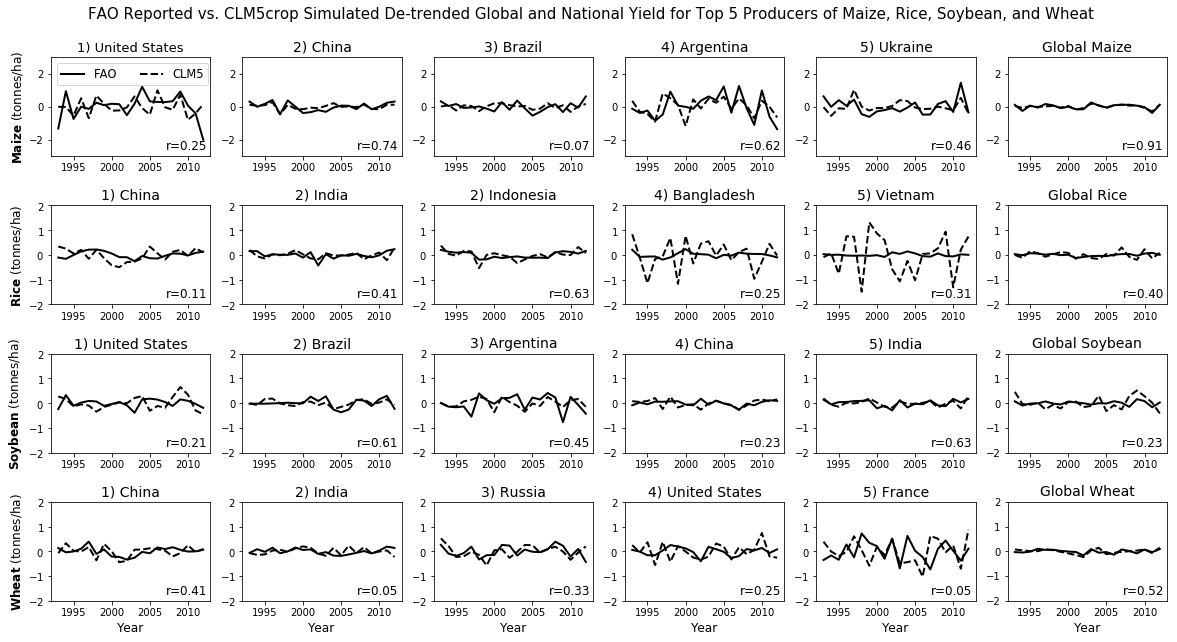

In [46]:
fig = plt.figure()
fig.set_size_inches(20,10)
#MAIZE
ax1 = fig.add_subplot(461)
ax1.plot(time,FAO_US,linewidth=2, color='k',label="FAO")
ax1.plot(time,CLM_US,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax1.set_ylim([-3, 3])
#ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.legend(loc="upper left", ncol=2, prop={'size': 11.5})
ax1.set_title('1) United States',size=13)
ax1.set_ylabel("$\mathbf{Maize}$" + " (tonnes/ha)", fontsize=12)
ax1.text(0.85, 0.1, 'r=0.25',horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=12)
#ax1.set_xlim([1993, 2014])
#ax1.set_xlabel("Year")
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useLocale=True, useMathText=True)
ax2 = fig.add_subplot(462)
ax2.plot(time,CLM_china,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax2.plot(time,FAO_china,linewidth=2, color='k',label="FAO")
ax2.set_title('2) China',size=14)
ax2.set_ylim([-3, 3])
#ax2.set_ylim([1.0e8, 2.5e8])
ax2.text(0.85, 0.1, 'r=0.74',horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=12)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax3 = fig.add_subplot(463)
ax3.plot(time,CLM_brazil,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax3.plot(time,FAO_brazil,linewidth=2, color='k',label="FAO")
ax3.set_ylim([-3, 3])
ax3.set_title('3) Brazil',size=14)
ax3.text(0.85, 0.1, 'r=0.07',horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, fontsize=12)
#ax3.set_xlabel("Year")
ax4 = fig.add_subplot(464)
ax4.plot(time,CLM_argentina,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax4.plot(time,FAO_argentina,linewidth=2, color='k',label="FAO")
ax4.set_title('4) Argentina',size=14)
ax4.set_ylim([-3, 3])
ax4.text(0.85, 0.1, 'r=0.62',horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes, fontsize=12)
#ax4.set_xlabel("Year")
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax5 = fig.add_subplot(465)
ax5.plot(time,CLM_ukraine,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax5.plot(time,FAO_ukraine,linewidth=2, color='k',label="FAO")
ax5.set_title('5) Ukraine',size=14)
ax5.set_ylim([-3, 3])
ax5.text(0.85, 0.1, 'r=0.46',horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes, fontsize=12)
#ax5.set_xlabel("Year")
ax6 = fig.add_subplot(466)
ax6.plot(time,chist3,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax6.plot(time,cfao,linewidth=2, color='k',label="FAO")
ax6.set_ylim([-3, 3])
ax6.set_title('Global Maize',size=14)
ax6.text(0.85, 0.1, 'r=0.91',horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes, fontsize=12)

#RICE
ax7 = fig.add_subplot(467)
ax7.plot(time,CLM_chinar,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax7.plot(time,FAO_chinar,linewidth=2, color='k',label="FAO")
ax7.set_title('1) China',size=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax7.set_ylabel("$\mathbf{Rice}$" + " (tonnes/ha)", fontsize=12)
ax7.set_ylim([-2, 2])
ax7.text(0.85, 0.1, 'r=0.11',horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes, fontsize=12)
ax8 = fig.add_subplot(468)
ax8.plot(time,CLM_indiar,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax8.plot(time,FAO_indiar,linewidth=2, color='k',label="FAO")
ax8.set_title('2) India',size=14)
ax8.set_ylim([-2, 2])
ax8.text(0.85, 0.1, 'r=0.41',horizontalalignment='center', verticalalignment='center', transform=ax8.transAxes, fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax9 = fig.add_subplot(469)
ax9.plot(time,CLM_indonesiar,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax9.plot(time,FAO_indonesiar,linewidth=2, color='k',label="FAO")
ax9.set_title('2) Indonesia',size=14)
ax9.set_ylim([-2, 2])
ax9.text(0.85, 0.1, 'r=0.63',horizontalalignment='center', verticalalignment='center', transform=ax9.transAxes, fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax10 = fig.add_subplot(4, 6, 10)
ax10.plot(time,CLM_bangladeshr,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax10.plot(time,FAO_bangladeshr,linewidth=2, color='k',label="FAO")
ax10.set_title('4) Bangladesh',size=14)
ax10.set_ylim([-2, 2])
ax10.text(0.85, 0.1, 'r=0.25',horizontalalignment='center', verticalalignment='center', transform=ax10.transAxes, fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax11 = fig.add_subplot(4, 6, 11)
ax11.plot(time,CLM_vietnamr,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax11.plot(time,FAO_vietnamr,linewidth=2, color='k',label="FAO")
ax11.set_title('5) Vietnam',size=14)
ax11.set_ylim([-2, 2])
ax11.text(0.85, 0.1, 'r=0.31',horizontalalignment='center', verticalalignment='center', transform=ax11.transAxes, fontsize=12)
ax12 = fig.add_subplot(4, 6, 12)
ax12.plot(time,rhist3,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax12.plot(time,rfao,linewidth=2, color='k',label="FAO")
ax12.set_ylim([-2, 2])
ax12.text(0.85, 0.1, 'r=0.40',horizontalalignment='center', verticalalignment='center', transform=ax12.transAxes, fontsize=12)
ax12.set_title('Global Rice',size=14)

#SOYBEAN
ax13 = fig.add_subplot(4, 6, 13)
ax13.plot(time,CLM_USs,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax13.plot(time,FAO_USs,linewidth=2, color='k',label="FAO")
ax13.set_title('1) United States',size=14)
ax13.set_ylim([-2, 2])
ax13.text(0.85, 0.1, 'r=0.21',horizontalalignment='center', verticalalignment='center', transform=ax13.transAxes, fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax13.set_ylabel("$\mathbf{Soybean}$" + " (tonnes/ha)", fontsize=12)
ax14 = fig.add_subplot(4, 6, 14)
ax14.plot(time,CLM_brazils,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax14.plot(time,FAO_brazils,linewidth=2, color='k',label="FAO")
ax14.set_title('2) Brazil',size=14)
ax14.set_ylim([-2, 2])
ax14.text(0.85, 0.1, 'r=0.61',horizontalalignment='center', verticalalignment='center', transform=ax14.transAxes, fontsize=12)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax15 = fig.add_subplot(4, 6, 15)
ax15.plot(time,CLM_argentinas,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax15.plot(time,FAO_argentinas,linewidth=2, color='k',label="FAO")
ax15.set_title('3) Argentina',size=14)
ax15.set_ylim([-2, 2])
ax15.text(0.85, 0.1, 'r=0.45',horizontalalignment='center', verticalalignment='center', transform=ax15.transAxes, fontsize=12)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax16 = fig.add_subplot(4, 6, 16)
ax16.plot(time,CLM_chinas,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax16.plot(time,FAO_chinas,linewidth=2, color='k',label="FAO")
ax16.set_title('4) China',size=14)
ax16.set_ylim([-2, 2])
ax16.text(0.85, 0.1, 'r=0.23',horizontalalignment='center', verticalalignment='center', transform=ax16.transAxes, fontsize=12)
ax16.yaxis.set_major_locator(MaxNLocator(integer=True))
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax17 = fig.add_subplot(4, 6, 17)
ax17.plot(time,CLM_indias,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax17.plot(time,FAO_indias,linewidth=2, color='k',label="FAO")
ax17.set_title('5) India',size=14)
ax17.set_ylim([-2, 2])
ax17.text(0.85, 0.1, 'r=0.63',horizontalalignment='center', verticalalignment='center', transform=ax17.transAxes, fontsize=12)
ax17.yaxis.set_major_locator(MaxNLocator(integer=True))
ax18 = fig.add_subplot(4, 6, 18)
ax18.plot(time,shist2,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax18.plot(time,sfao,linewidth=2, color='k',label="FAO")
ax18.set_ylim([-2, 2])
ax18.text(0.85, 0.1, 'r=0.23',horizontalalignment='center', verticalalignment='center', transform=ax18.transAxes, fontsize=12)
ax18.set_title('Global Soybean',size=14)

#WHEAT
ax19 = fig.add_subplot(4, 6, 19)
ax19.plot(time,CLM_chinaw,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax19.plot(time,FAO_chinaw,linewidth=2, color='k',label="FAO")
ax19.set_title('1) China',size=14)
ax19.set_xlabel("Year", fontsize=12)
ax19.set_ylim([-2, 2])
ax19.text(0.85, 0.1, 'r=0.41',horizontalalignment='center', verticalalignment='center', transform=ax19.transAxes, fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax19.set_ylabel("$\mathbf{Wheat}$" + " (tonnes/ha)", fontsize=12)
ax20 = fig.add_subplot(4, 6, 20)
ax20.plot(time,CLM_indiaw,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax20.plot(time,FAO_indiaw,linewidth=2, color='k',label="FAO")
ax20.set_title('2) India',size=14)
ax20.set_ylim([-2, 2])
ax20.text(0.85, 0.1, 'r=0.05',horizontalalignment='center', verticalalignment='center', transform=ax20.transAxes, fontsize=12)
ax20.set_xlabel("Year", fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax21 = fig.add_subplot(4, 6, 21)
ax21.plot(time,CLM_russiaw,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax21.plot(time,FAO_russiaw,linewidth=2, color='k',label="FAO")
ax21.set_title('3) Russia',size=14)
ax21.set_xlabel("Year", fontsize=12)
ax21.set_ylim([-2, 2])
ax21.text(0.85, 0.1, 'r=0.33',horizontalalignment='center', verticalalignment='center', transform=ax21.transAxes, fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax22 = fig.add_subplot(4, 6, 22)
ax22.plot(time,CLM_USw,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax22.plot(time,FAO_USw,linewidth=2, color='k',label="FAO")
ax22.set_title('4) United States',size=14)
ax22.set_xlabel("Year", fontsize=12)
ax22.set_ylim([-2, 2])
ax22.text(0.85, 0.1, 'r=0.25',horizontalalignment='center', verticalalignment='center', transform=ax22.transAxes, fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax23 = fig.add_subplot(4, 6, 23)
ax23.plot(time,CLM_francew,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax23.plot(time,FAO_francew,linewidth=2, color='k',label="FAO")
ax23.set_title('5) France',size=14)
ax23.set_xlabel("Year", fontsize=12)
ax23.set_ylim([-2, 2])
ax23.text(0.85, 0.1, 'r=0.05',horizontalalignment='center', verticalalignment='center', transform=ax23.transAxes, fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax24 = fig.add_subplot(4, 6, 24)
ax24.plot(time,whist3,linewidth=2,color='k', linestyle='dashed',label="CLM5")
ax24.plot(time,wfao,linewidth=2, color='k',label="FAO")
ax24.set_title('Global Wheat',size=14)
ax24.set_ylim([-2, 2])
ax24.set_xlabel("Year", fontsize=12)
ax24.text(0.85, 0.1, 'r=0.52',horizontalalignment='center', verticalalignment='center', transform=ax24.transAxes, fontsize=12)

fig.suptitle('FAO Reported vs. CLM5crop Simulated De-trended Global and National Yield for Top 5 Producers of Maize, Rice, Soybean, and Wheat', size=15, y=0.95)
plt.subplots_adjust(hspace=0.5)
#plt.savefig(savedir+'Historical_and_global_yield_1993-2012_danica_detrend_rvalue.pdf', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )